In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from math import radians, cos, sin, asin, sqrt

%matplotlib inline

In [0]:
df_ocorrencias = pd.read_csv('gdrive/My Drive/projetos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_tipo', 'ocorrencia_uf',\
                 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_horario', 'ocorrencia_dia'])

print(df_ocorrencias.head(5))
print(df_ocorrencias.shape)

   codigo_ocorrencia ocorrencia_classificacao  ... ocorrencia_dia  ocorrencia_horario
0    201305055424986                 ACIDENTE  ...     2013-05-05            11:00:00
1    201805021421302                INCIDENTE  ...     2018-03-09            22:40:00
2    201605160250139          INCIDENTE GRAVE  ...     2016-05-13            19:19:00
3    201311259977425          INCIDENTE GRAVE  ...     2013-11-25            12:32:00
4    200808073991179                 ACIDENTE  ...     2008-08-07            15:10:00

[5 rows x 8 columns]
(5733, 8)


In [0]:
df_ocorrencias_sudeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

print(df_ocorrencias_sudeste.head(5))
print(df_ocorrencias_sudeste.shape)

    codigo_ocorrencia  ... ocorrencia_horario
21    201609131430542  ...           14:10:00
22    201212272090341  ...           16:03:00
23    200906128607729  ...           14:50:00
24    201408227604299  ...           14:30:00
25    200801159627220  ...           11:41:00

[5 rows x 8 columns]
(2536, 8)


In [0]:
df_fatores_contribuintes = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_nome'])

print(df_fatores_contribuintes.head(5))
print(df_fatores_contribuintes.shape)

   codigo_ocorrencia               fator_nome
0    200801041545367      INDISCIPLINA DE VOO
1    200801041545367                INSTRUÇÃO
2    200801041545367   MANUTENÇÃO DE AERONAVE
3    200801041545367              OUTRO FATOR
4    200801058203864  JULGAMENTO DE PILOTAGEM
(4800, 2)


In [0]:
df_aeronaves_envolvidas = pd.read_csv('gdrive/My Drive/projetos/lp/anv.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'aeronave_tipo_veiculo', 'aeronave_fabricante',\
                'aeronave_modelo', 'aeronave_motor_tipo', 'aeronave_motor_quantidade',\
                        'aeronave_ano_fabricacao', 'aeronave_tipo_operacao', 'total_fatalidades'])

print(df_aeronaves_envolvidas.head(5))
print(df_aeronaves_envolvidas.shape)

   codigo_ocorrencia  ... total_fatalidades
0    201106142171203  ...                 0
1    200804256669287  ...                 0
2    201205209591320  ...                 0
3    201012015549851  ...                 0
4    201708190325167  ...                 0

[5 rows x 9 columns]
(5794, 9)


In [0]:
df_ocorrencias_fatores_sudeste = pd.merge(df_ocorrencias_sudeste, df_fatores_contribuintes, on='codigo_ocorrencia', how='inner')

print(df_ocorrencias_fatores_sudeste.head(5))
print(df_ocorrencias_fatores_sudeste.shape)
#print(df_ocorrencias_fatores_sudeste.describe())

   codigo_ocorrencia  ...                         fator_nome
0    200801159627220  ...                            ATITUDE
1    200801159627220  ...       CULTURA DO GRUPO DE TRABALHO
2    200801159627220  ...          CARACTERÍSTICAS DA TAREFA
3    200801159627220  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
4    200801159627220  ...                   PESSOAL DE APOIO

[5 rows x 9 columns]
(1300, 9)


In [0]:
df_ocorrencias_cond_met_sudeste = df_ocorrencias_fatores_sudeste.loc[df_ocorrencias_fatores_sudeste['fator_nome'].isin(['CONDIÇÕES METEOROLÓGICAS ADVERSAS'])]

print(df_ocorrencias_cond_met_sudeste.head(5))
print(df_ocorrencias_cond_met_sudeste.shape)


    codigo_ocorrencia  ...                         fator_nome
3     200801159627220  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
6     201207125348634  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
46    200802265376981  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
74    201311205508363  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
92    200905142478810  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS

[5 rows x 9 columns]
(41, 9)


In [0]:
df_ocorrencias_cond_met_aeronaves_sudeste = pd.merge(df_ocorrencias_cond_met_sudeste, df_aeronaves_envolvidas, on='codigo_ocorrencia', how='inner')

print(df_ocorrencias_cond_met_aeronaves_sudeste.head(5))
print(df_ocorrencias_cond_met_aeronaves_sudeste.shape)
#print(df_ocorrencias_fatores_sudeste.describe())


   codigo_ocorrencia  ... total_fatalidades
0    200801159627220  ...                 0
1    201207125348634  ...                 3
2    200802265376981  ...                 5
3    201311205508363  ...                 1
4    200905142478810  ...                 0

[5 rows x 17 columns]
(41, 17)


In [0]:
df_ocorrencias_cond_met_aeronaves_sudeste.to_csv ('gdrive/My Drive/projetos/lp/ocorrencias_cond_met_aeronaves_sudeste.csv', index = None, header=True)

In [0]:
df_met_sudeste = pd.read_csv('gdrive/My Drive/projetos/lp/sudeste.csv', sep=',', header=0,\
         usecols=['wsid','wsnm', 'elvt', 'lat', 'lon', 'city', 'prov', 'mdct', 'date',
         'yr', 'mo', 'da', 'hr', 'stp', 'gbrd', 'temp', 'hmdy', 'wdsp', 'wdct', 'gust'])

print(df_met_sudeste.head(5))
print(df_met_sudeste.shape)
#print(df_ocorrencias_fatores_sudeste.describe())


   wsid         wsnm   elvt       lat        lon  ...  temp  hmdy wdsp   wdct  gust
0   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  29.3  35.0  3.2  101.0   6.5
1   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  29.0  39.0  3.6   94.0   6.4
2   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  27.4  44.0  2.5   93.0   6.9
3   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  25.8  58.0  1.7   96.0   5.8
4   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  25.4  57.0  3.1  110.0   7.5

[5 rows x 20 columns]
(9779168, 20)


In [0]:

#new = pd.concat([df_ocorrencias_cond_met_aeronaves_sudeste,df_met_sudeste], axis=1, ignore_index=True)

#print(new.head(5))
#print(new.shape)

#df_ocorrencias_cond_met_aeronaves_sudeste.join(df_met_sudeste)

df_ocorrencias_cond_met_aeronaves_sudeste.rename(columns={'ocorrencia_dia': 'date'}, inplace=True)
df_ocorrencias_cond_met_aeronaves_sudeste.rename(columns={'ocorrencia_uf': 'prov'}, inplace=True)

df_ocorrencias_cond_met_aeronaves_sudeste['tmp'] = 1
df_met_sudeste['tmp'] = 1

tabelao = pd.merge(df_ocorrencias_cond_met_aeronaves_sudeste, df_met_sudeste, on=['tmp', 'date', 'prov'])
tabelao = tabelao.drop('tmp', axis=1)


print(tabelao.head(5))
print(tabelao.shape)

tabelao.to_csv ('gdrive/My Drive/projetos/lp/tabelao.csv', index = None, header=True)

   codigo_ocorrencia ocorrencia_classificacao ocorrencia_tipo  ...  wdsp  wdct gust
0    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
1    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
2    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
3    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
4    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0

[5 rows x 35 columns]
(29856, 35)


In [0]:
def haversine(row):
    # Raio da Terra em Km
    r = 6371
    # Converte coordenadas de graus para radianos

    lat1, lon1, lat2, lon2 = map(radians, [row['ocorrencia_latitude'], row['ocorrencia_longitude'],\
            row['lat'], row['lon']])

    # Formula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    d = 2 * r * asin( sqrt(hav) )
    idwsid = 0
    if (d <= 110):
    #idwsid = df['wsid']
        idwsid = 1
    return idwsid

def haversine_valor(row):
    # Raio da Terra em Km
    r = 6371
    # Converte coordenadas de graus para radianos

    lat1, lon1, lat2, lon2 = map(radians, [row['ocorrencia_latitude'], row['ocorrencia_longitude'],\
            row['lat'], row['lon']])

    # Formula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    d = 2 * r * asin( sqrt(hav) )
    return d

def cruzar_horas(row):
    condicao = 0
    if (row['ocorrencia_horario_hr'] == row['mdct_hr']):
        condicao = 1
    return condicao
    

tabelao['ocorrencia_horario'] = pd.to_datetime(tabelao['ocorrencia_horario'])
tabelao['ocorrencia_horario_hr'] = tabelao['ocorrencia_horario'].map(lambda x: x.strftime('%H'))    


tabelao['mdct'] = pd.to_datetime(tabelao['mdct'])
tabelao['mdct_hr'] = tabelao['mdct'].map(lambda x: x.strftime('%H'))    
      
tabelao['ocorrencia_estacao'] = tabelao.apply(haversine, axis=1)

tabelao['ocorrencia_estacao_hora'] = tabelao.apply(cruzar_horas, axis=1)

#tabelao[tabelao['ocorrencia_estacao'] == True]

tabelao_110km = tabelao.loc[((tabelao['ocorrencia_estacao']) > 0) & ((tabelao['ocorrencia_estacao_hora']) > 0)]

tabelao_110km['ocorrencia_estacao_distancia'] = tabelao_110km.apply(haversine_valor, axis=1)

#tabelao_110km = tabelao.loc[]

#tabelao_110km_unidade = tabelao_110km.groupby('codigo_ocorrencia').min()['ocorrencia_estacao_distancia']

#tabelao_110km[tabelao_110km['ocorrencia_estacao_distancia'].isin(tabelao_110km.groupby('codigo_ocorrencia').min()['ocorrencia_estacao_distancia'].values)]

#tabelao_110km.loc[tabelao_110km.groupby('codigo_ocorrencia')['ocorrencia_estacao_distancia'].idmin

tabelao_110km_uni = tabelao_110km.groupby(['codigo_ocorrencia'])['ocorrencia_estacao_distancia'].min()

tabelao_40 = pd.merge(tabelao_110km, tabelao_110km_uni, on=['ocorrencia_estacao_distancia']).drop_duplicates()

#print(tabelao_110km_uni.shape)

print(tabelao_40.shape)


#print(tabelao_110km['codigo_ocorrencia'].value_counts())

print(tabelao_40['codigo_ocorrencia'].value_counts())


#print(tabelao_110km.dtypes)

tabelao_40.to_csv ('gdrive/My Drive/projetos/lp/tabelao_40.csv', index = None, header=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(39, 40)
201012091012069    1
201206022037551    1
201101308909677    1
201101012554670    1
201002264597949    1
201007243412590    1
200801235808261    1
201204268107243    1
200906134111359    1
200804303594333    1
201109104280788    1
201207286338230    1
201109096211708    1
200905142478810    1
200802265376981    1
200801159627220    1
200901179589815    1
201202075853502    1
200802236257231    1
201108309734742    1
200909218862179    1
201110011567899    1
201111153377811    1
200908213725671    1
201110163307115    1
200804195711783    1
200812308352487    1
200909036780777    1
201002174449839    1
200801112101167    1
201602261542222    1
201502197258957    1
201211115599083    1
201408136355580    1
200905252360628    1
201407052477200    1
201302039792556    1
201207125348634    1
201311205508363    1
Name: codigo_ocorrencia, dtype: int64


In [0]:
from folium import plugins
coordenadas = []

lat = tabelao_40['lat'][:500].values
long = tabelao_40['lon'][:500].values

lat_oco = tabelao_40['ocorrencia_latitude'][:500].values
long_oco = tabelao_40['ocorrencia_longitude'][:500].values

mapa = folium.Map(location=[-23.5489,-46.6388],tiles='OpenStreetMap',zoom_start=5)

for la,lo in zip(lat,long):
    folium.Marker([la, lo]).add_to(mapa)
for la,lo in zip(lat_oco, long_oco):
    coordenadas.append([la,lo])



mapa.add_child(plugins.HeatMap(coordenadas))
mapa

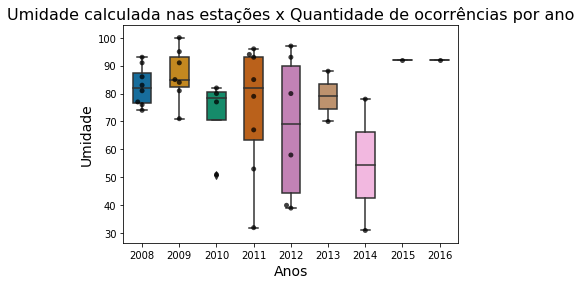

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='hmdy', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='hmdy', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Umidade calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Umidade",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

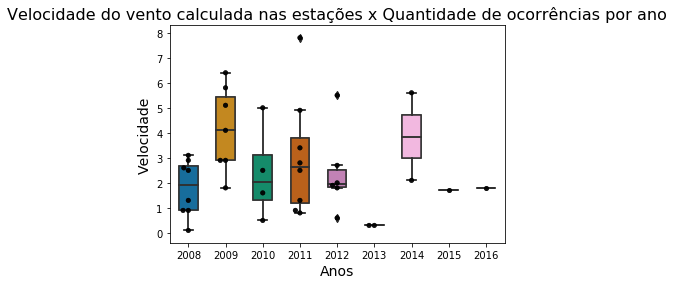

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='wdsp', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='wdsp', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Velocidade do vento calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Velocidade",
                fontsize=14)
 
bplot.tick_params(labelsize=10)


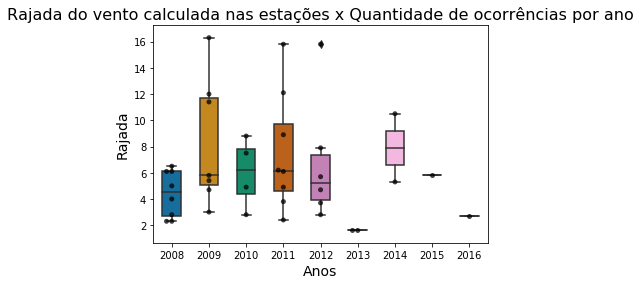

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='gust', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='gust', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Rajada do vento calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Rajada",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

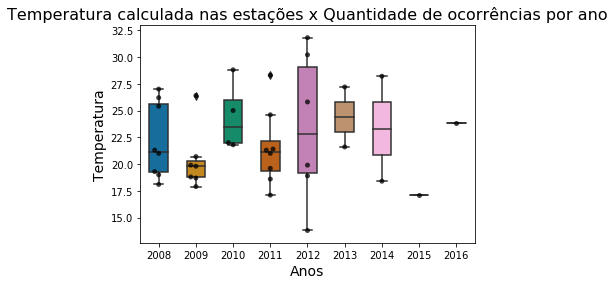

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='temp', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='temp', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Temperatura calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Temperatura",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

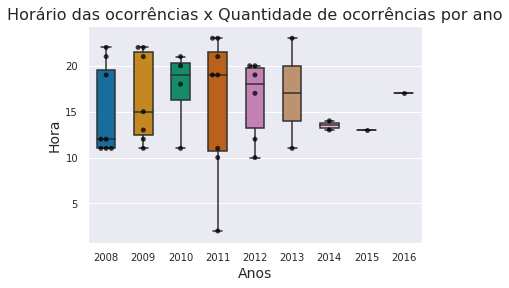

In [0]:
#tabelao_40.ocorrencia_horario_hr.astype('int64')

tabelao_40['ocorrencia_horario_hr']=tabelao_40['ocorrencia_horario_hr'].astype(np.float)

#print(tabelao_40.dtypes)

# plot boxplot with seaborn
bplot=sns.boxplot(y='ocorrencia_horario_hr', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='ocorrencia_horario_hr', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Horário das ocorrências x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Hora",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

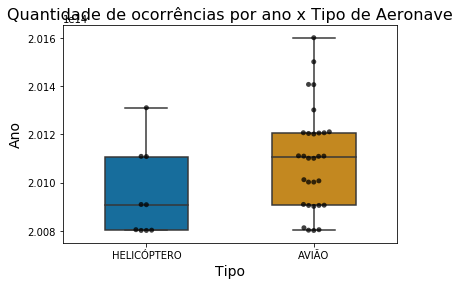

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='codigo_ocorrencia', x='aeronave_tipo_veiculo', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='codigo_ocorrencia', x='aeronave_tipo_veiculo',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Quantidade de ocorrências por ano x Tipo de Aeronave",
                    fontsize=16)
 
bplot.set_xlabel("Tipo", 
                fontsize=14)
 
bplot.set_ylabel("Ano",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

In [0]:
df_fatores_contribuintes_completa = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0)

tabelao_40_fatores = pd.merge(tabelao_40, df_fatores_contribuintes_completa, on=['codigo_ocorrencia'])

print(tabelao_40_fatores.head(5))

tabelao_40_fatores.to_csv ('gdrive/My Drive/projetos/lp/tabela_40_fatores.csv', index = None, header=True)

#tabelao_40_fatores.fator_condicionante.apply(str)

#tabelao_40_fatores['fator_condicionante']= tabelao_40_fatores['fator_condicionante'].astype('str')

#print(tabelao_40_fatores.dtypes)


sns.set(color_codes=True)

#sns.distplot(tabelao_40_fatores['fator_condicionante'].value_counts())

#plt.barh(tabelao_40_fatores['fator_condicionante'],)

#tabelao_40_fatores.fator_nome_y.value_counts().plot(kind='barh', figsize=(10,5), grid=False, rot=0, color='blue')

#print(tabelao_40_fatores['fator_condicionante'].value_counts())

#f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
#sns.despine(left=True)


#sns.distplot(tabelao_40_fatores.fator_condicionante, color="m", ax=axes[1, 1])


#plt.setp(axes, yticks=[])
#plt.tight_layout()


   codigo_ocorrencia  ... fator_dia_extracao
0    200801159627220  ...         2019-01-30
1    200801159627220  ...         2019-01-30
2    200801159627220  ...         2019-01-30
3    200801159627220  ...         2019-01-30
4    200801159627220  ...         2019-01-30

[5 rows x 46 columns]


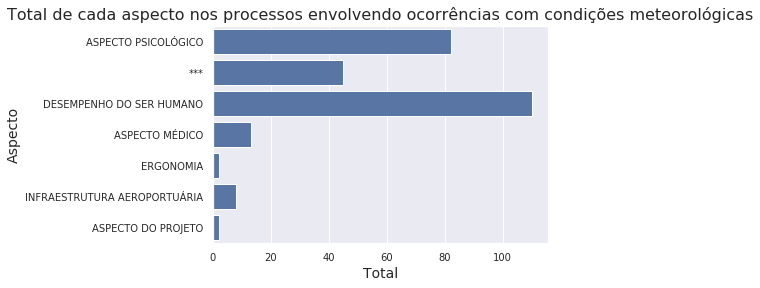

In [0]:
#sns.set(style="whitegrid")

bplot=sns.countplot(y="fator_aspecto", data=tabelao_40_fatores, color="b")

bplot.axes.set_title("Total de cada aspecto nos processos envolvendo ocorrências com condições meteorológicas",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Aspecto",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

#data_counts_1 = tabelao_40_fatores['fator_condicionante'].value_counts()

#print(data_counts_1)

#ax = sns.barplot(data=data_counts_1)

#tabelao_40_fatores.fator_aspecto.value_counts().plot(kind='barh', figsize=(10,5), grid=False, rot=0, color='blue')

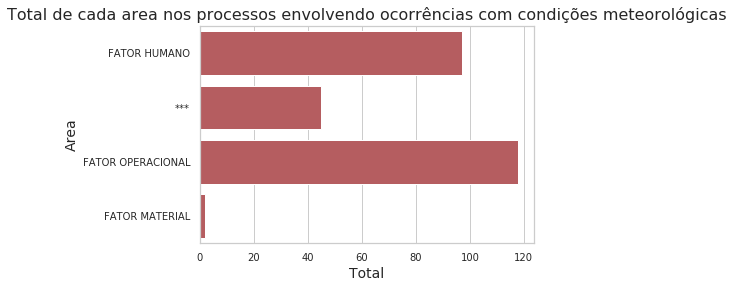

In [0]:
#sns.set(style="whitegrid")

bplot=sns.countplot(y="fator_area", data=tabelao_40_fatores, color="r")

bplot.axes.set_title("Total de cada area nos processos envolvendo ocorrências com condições meteorológicas",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Area",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

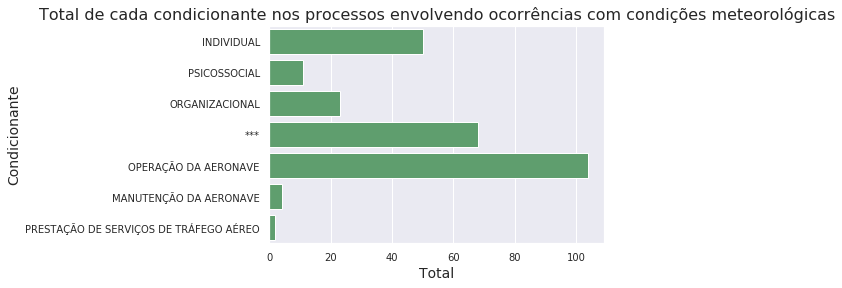

In [0]:
bplot=sns.countplot(y="fator_condicionante", data=tabelao_40_fatores, color="g")

bplot.axes.set_title("Total de cada condicionante nos processos envolvendo ocorrências com condições meteorológicas",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Condicionante",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

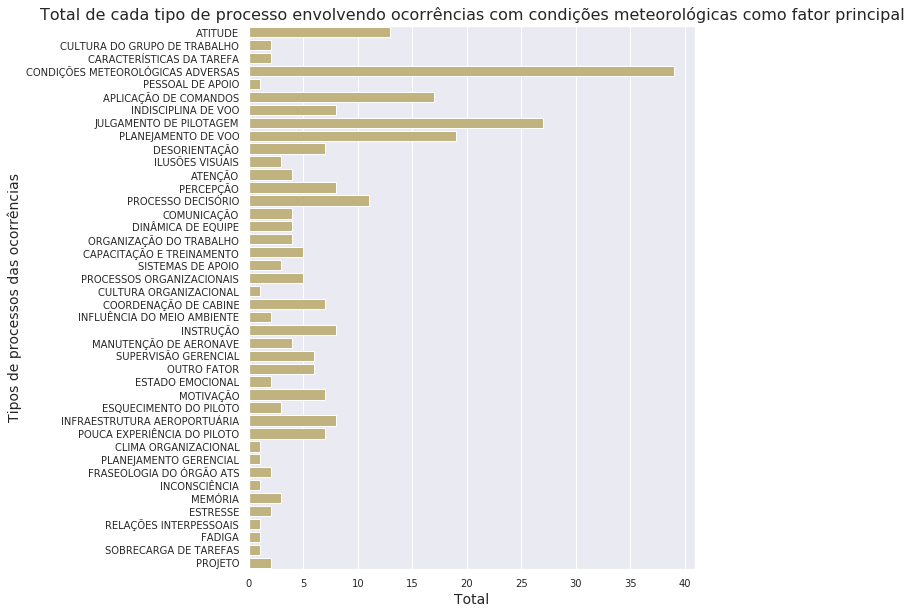

In [0]:
plt.figure(figsize=(8,10)) 

bplot=sns.countplot(y="fator_nome_y", data=tabelao_40_fatores, color="y")


bplot.axes.set_title("Total de cada tipo de processo envolvendo ocorrências com condições meteorológicas como fator principal",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Tipos de processos das ocorrências",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

plt.show()

In [0]:
from folium import plugins
coordenadas = []
lat = tabelao_40['ocorrencia_latitude'][:500].values
long = tabelao_40['ocorrencia_longitude'][:500].values

mapa = folium.Map(location=[-15.788497,-47.879873],tiles='Stamen Toner',zoom_start=4)

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])

mapa.add_child(plugins.HeatMap(coordenadas))
mapa

In [0]:
l2 = df_met_sudeste.loc[:, ['wsid']]
print(l2)

new = l2.groupby('wsid')

print(new.head(5))
#print(new.shape)

In [0]:
def haversine(rowlat1, rowlon1, rowlat2, rowlon2):
    # Raio da Terra em Km
    r = 6371
    # Converte coordenadas de graus para radianos

    lat1, lon1, lat2, lon2 = map(radians, [rowlat1, rowlon1,\
            rowlat1, rowlat2])

    # Formula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    d = 2 * r * asin( sqrt(hav) )
    idwsid = None
    if (d <= 20):
    #idwsid = df['wsid']
        idwsid = True
    else:
        idwsid = False
    return idwsid

def encontrar_relacao(latitude, longitude, df):
    new1 = df.apply(haversine(latitude, longitude, df['lat'], df['lon'], axis=1)
         
new2 = df_ocorrencias_cond_met_aeronaves_sudeste.apply(encontrar_relacao(df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_latitude'],df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_longitude'], df_met_sudeste), axis=1)
new.head(5)

In [0]:
#==============================================================================================

#===============================================================================================

def criar_dicionario_localizacao_ocorrencias(df1):
        df1_localizacao_geral = {}
        for index, rows in df1.iterrows():
                df1_localizacao = []
                codigo_ocorrencia = rows.codigo_ocorrencia
                latitude = rows.ocorrencia_latitude
                longitude = rows.ocorrencia_longitude
                hora = rows.ocorrencia_horario
                data = rows.ocorrencia_dia
                df1_localizacao.append(index)
                #df1_localizacao.append(codigo_ocorrencia)
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(hora)
                df1_localizacao.append(data)
                df1_localizacao_geral[rows.codigo_ocorrencia] = df1_localizacao
                #print(df1_localizacao)

        #print(df1_localizacao_geral)

        return df1_localizacao_geral

#dic_ocorrencias = criar_dicionario_localizacao_ocorrencias(df_ocorrencias_cond_met_aeronaves_sudeste)

#print(dic_ocorrencias)

def criar_dicionario_localizacao_estacoes(df1):
        df1_localizacao_geral = {}
        for i in df1.iterrows():
                df1_localizacao = []
                latitude = i.lat
                longitude = i.lon
                data_hora = i.mdct
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(data_hora)
                df1_localizacao_geral[i.wsid] = df1_localizacao
                #print(df1_localizacao)

        #print(df1_localizacao_geral)

        return df1_localizacao_geral

#dic_estacoes = criar_dicionario_localizacao_estacoes(df_met_sudeste)

#================================================================================================

# def extrair_lat_or_lon_2(rowlat2, rowlon2):

def cruzar_dados(serie1, serie2):
        lista = []
        lista.append(serie1)
        lista.append(serie2)
        return lista

def extrair_lat_or_lon(rowlat1, rowlon1):
        lista = []
        lista.append(rowlat1, rowlon1)
        #lista2 = []
        #lista2 = map(extrair_lat_or_lon_2,)
        return lista

# Formula de Haversine
def haversine(serie1, serie2):
        # print(x)
        # Raio da Terra em Km
        r = 6371
        # Converte coordenadas de graus para radianos
        #y = col1.tolist()
        #col1.map(extrair_lat_or_lon)
        
        #lista = col1.index.map(col2.index.map(df['lat'].index.map(df['lon'].index.map(extrair_lat_or_lon))))
        #print(lista)

        lista = map(cruzar_dados, (df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_latitude'],\
                df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_longitude']))
        
        #lista = map(extrair_lat_or_lon, rowlat1, rowlon1)

        print(lista)

        print(list(lista))

        # lat1, lon1, lat2, lon2 = map(radians, [rowlat1, rowlon1,\
        #          rowlat1, rowlat2])

        # Formula de Haversine
        # dlon = lon2 - lon1
        # dlat = lat2 - lat1
        # hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        # d = 2 * r * asin( sqrt(hav) )
        # idwsid = 0
        # if (d <= 12):
        #         idwsid = df['wsid']
        # return idwsid

# def criar_lista_lat_lon(a):
#         # lista = []
#         # lista.append(a)
#         #lista.append(b)
#         return a

#print(df_ocorrencias_cond_met_aeronaves_sudeste.shape)
#print(df_met_sudeste.shape)

#df_met_sudeste.describe()

#l1 = df_ocorrencias_cond_met_aeronaves_sudeste.loc[:, ['ocorrencia_latitude','ocorrencia_longitude']]

#print(l1)

l2 = df_met_sudeste.loc[:, ['wsid','lat','lon']]
print(l2)
#a = 0
#while True:
#       
#        print( l2.loc[a,['wsid', 'lat']])
#        a += 1
#print(l2.loc[:'lat'])

def lat_lon

# df_ocorrencias_cond_met_aeronaves_sudeste['wsid'] = df_ocorrencias_cond_met_aeronaves_sudeste.apply\
#         (haversine(df_met_sudeste['lat'], df_met_sudeste['lon']), axis=1)

# df_ocorrencias_cond_met_aeronaves_sudeste['wsid'] = df_ocorrencias_cond_met_aeronaves_sudeste.apply\
#         (df_met_sudeste.apply(lambda row: haversine(row['lat'], row['lon'], row['ocorrencia_latitude'],\
#              row['ocorrencia_longitude']), axis=1))

 
#print(haversine(dic_ocorrencias, dic_estacoes))

#dic_haversine = haversine(dic_ocorrencias, dic_estacoes)

#print((haversine(dic_ocorrencias, dic_estacoes)).keys())

#print(len((haversine(dic_ocorrencias, dic_estacoes)).keys()))

#===============================================================================================

# def preencher_estacao(dic_haversine, df):
#         print(df.head(5))
#         idx = 0
#         for k,v in dic_haversine.items():
#                 if (df['codigo_ocorrencia'] == k).item():
#                         df.insert(idx,'estacao', v)
#                         idx += 1
#         return df

#df_ocorrencias_com_id_estacao = preencher_estacao(dic_haversine, df_ocorrencias_cond_met_aeronaves_sudeste)

#print(df_ocorrencias_com_id_estacao.head())

#================================================================================================

# def filtro_sudeste(df, dic):
#         for k,v in dic.items():
#                 df_filtrado = df.loc[df['wsid'].isin([v])]
#                 df_filtrado.to_csv ('/home/joao/Documentos/lp/'+str(v)+'.csv', index = None, header=True)

#filtro_sudeste(df_met_sudeste,dic_haversine)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt


df_ocorrencias = pd.read_csv('/home/joao/Documentos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_tipo', 'ocorrencia_uf',\
                 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_horario', 'ocorrencia_dia'])

#print(df_ocorrencias.head(5))
#print(df_ocorrencias.shape)

df_ocorrencias_sudeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

df_fatores_contribuintes = pd.read_csv('/home/joao/Documentos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_nome'])

#print(df_fatores_contribuintes.head(5))
#print(df_fatores_contribuintes.shape)

df_aeronaves_envolvidas = pd.read_csv('/home/joao/Documentos/lp/anv.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'aeronave_tipo_veiculo', 'aeronave_fabricante',\
                'aeronave_modelo', 'aeronave_motor_tipo', 'aeronave_motor_quantidade',\
                        'aeronave_ano_fabricacao', 'aeronave_tipo_operacao', 'total_fatalidades'])

#print(df_aeronaves_envolvidas.head(5))
#print(df_aeronaves_envolvidas.shape)

df_ocorrencias_fatores_sudeste = pd.merge(df_ocorrencias_sudeste, df_fatores_contribuintes, on='codigo_ocorrencia', how='inner')

df_ocorrencias_cond_met_sudeste = df_ocorrencias_fatores_sudeste.loc[df_ocorrencias_fatores_sudeste['fator_nome'].isin(['CONDIÇÕES METEOROLÓGICAS ADVERSAS'])]

#print(df_ocorrencias_cond_met_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_ocorrencias_cond_met_sudeste.shape)

df_ocorrencias_cond_met_aeronaves_sudeste = pd.merge(df_ocorrencias_cond_met_sudeste, df_aeronaves_envolvidas, on='codigo_ocorrencia', how='inner')

#print(df_ocorrencias_cond_met_aeronaves_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_ocorrencias_cond_met_aeronaves_sudeste.shape)


df_ocorrencias_cond_met_aeronaves_sudeste.to_csv ('/home/joao/Documentos/lp/ocorrencias_cond_met_aeronaves_sudeste.csv', index = None, header=True)


#==============================================================================================

df_met_sudeste = pd.read_csv('/home/joao/Documentos/lp/sudeste.csv', sep=',', header=0,\
         usecols=['wsid','wsnm', 'elvt', 'lat', 'lon', 'city', 'prov', 'mdct', 'date',
         'yr', 'mo', 'da', 'hr', 'stp', 'gbrd', 'temp', 'hmdy', 'wdsp', 'wdct', 'gust'])

#print(df_met_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_met_sudeste.shape)

#===============================================================================================

def criar_dicionario_localizacao_ocorrencias(df1):
        df1_localizacao_geral = {}
        for index, rows in df1.iterrows():
                df1_localizacao = []
                codigo_ocorrencia = rows.codigo_ocorrencia
                latitude = rows.ocorrencia_latitude
                longitude = rows.ocorrencia_longitude
                hora = rows.ocorrencia_horario
                data = rows.ocorrencia_dia
                df1_localizacao.append(index)
                #df1_localizacao.append(codigo_ocorrencia)
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(hora)
                df1_localizacao.append(data)
                df1_localizacao_geral[rows.codigo_ocorrencia] = df1_localizacao
                #print(df1_localizacao)

        #print(df1_localizacao_geral)

        return df1_localizacao_geral

#dic_ocorrencias = criar_dicionario_localizacao_ocorrencias(df_ocorrencias_cond_met_aeronaves_sudeste)


def criar_dicionario_localizacao_estacoes(df1):
        df1_localizacao_geral = {}
        for i in df1.iterrows():
                df1_localizacao = []
                latitude = i.lat
                longitude = i.lon
                data_hora = i.mdct
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(data_hora)
                df1_localizacao_geral[i.wsid] = df1_localizacao
                #print(df1_localizacao)

        #print(df1_localizacao_geral)

        return df1_localizacao_geral

#dic_estacoes = criar_dicionario_localizacao_estacoes(df_met_sudeste)

#================================================================================================

def extrair_lat_or_lon(x):
        #print(x)
        return x

# Formula de Haversine
def haversine(df, col1, col2):
        # Raio da Terra em Km
        r = 6371
        # Converte coordenadas de graus para radianos
        #y = col1.tolist()
        #col1.map(extrair_lat_or_lon)
        
        lista = col1.index.map(col2.index.map(df['lat'].index.map(df['lon'].index.map(extrair_lat_or_lon))))
        print(lista)
        #lat1, lon1, lat2, lon2 = map(radians, [col1.index.map(extrair_lat_or_lon), col2.index.map(extrair_lat_or_lon),\
        #         df['lat'].index.map(extrair_lat_or_lon), df['lon'].index.map(extrair_lat_or_lon)])

        # Formula de Haversine
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        d = 2 * r * asin( sqrt(hav) )
        idwsid = 0
        if (d <= 12):
                idwsid = df['wsid']
        return idwsid


df_ocorrencias_cond_met_aeronaves_sudeste['wsid'] = df_ocorrencias_cond_met_aeronaves_sudeste.apply\
        (haversine(df_met_sudeste, df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_latitude'], df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_longitude']), axis=1)


#print(haversine(dic_ocorrencias, dic_estacoes))

#dic_haversine = haversine(dic_ocorrencias, dic_estacoes)

#print((haversine(dic_ocorrencias, dic_estacoes)).keys())

#print(len((haversine(dic_ocorrencias, dic_estacoes)).keys()))

#===============================================================================================

# def preencher_estacao(dic_haversine, df):
#         print(df.head(5))
#         idx = 0
#         for k,v in dic_haversine.items():
#                 if (df['codigo_ocorrencia'] == k).item():
#                         df.insert(idx,'estacao', v)
#                         idx += 1
#         return df

#df_ocorrencias_com_id_estacao = preencher_estacao(dic_haversine, df_ocorrencias_cond_met_aeronaves_sudeste)

#print(df_ocorrencias_com_id_estacao.head())

#================================================================================================

# def filtro_sudeste(df, dic):
#         for k,v in dic.items():
#                 df_filtrado = df.loc[df['wsid'].isin([v])]
#                 df_filtrado.to_csv ('/home/joao/Documentos/lp/'+str(v)+'.csv', index = None, header=True)

#filtro_sudeste(df_met_sudeste,dic_haversine)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt


# df_sudeste = pd.read_csv('/home/joao/Documentos/lp/sudeste.csv', sep=',', header=0, usecols=["elvt"])
# print(df_sudeste.head(5))

# def test_intertuples(df):
#     for i in df.itertuples():
#         elevation = i.elvt
#         print(elevation)

# test_intertuples(df_sudeste)

df_ocorrencias = pd.read_csv('/home/joao/Documentos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_tipo', 'ocorrencia_uf',\
                 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_horario', 'ocorrencia_dia'])

#print(df_ocorrencias.head(5))
#print(df_ocorrencias.shape)

df_ocorrencias_sudeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

df_fatores_contribuintes = pd.read_csv('/home/joao/Documentos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_nome'])

#print(df_fatores_contribuintes.head(5))
#print(df_fatores_contribuintes.shape)

df_aeronaves_envolvidas = pd.read_csv('/home/joao/Documentos/lp/anv.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'aeronave_tipo_veiculo', 'aeronave_fabricante',\
                'aeronave_modelo', 'aeronave_motor_tipo', 'aeronave_motor_quantidade',\
                        'aeronave_ano_fabricacao', 'aeronave_tipo_operacao', 'total_fatalidades'])

#print(df_aeronaves_envolvidas.head(5))
#print(df_aeronaves_envolvidas.shape)

df_ocorrencias_fatores_sudeste = pd.merge(df_ocorrencias_sudeste, df_fatores_contribuintes, on='codigo_ocorrencia', how='inner')

df_ocorrencias_cond_met_sudeste = df_ocorrencias_fatores_sudeste.loc[df_ocorrencias_fatores_sudeste['fator_nome'].isin(['CONDIÇÕES METEOROLÓGICAS ADVERSAS'])]

#print(df_ocorrencias_cond_met_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_ocorrencias_cond_met_sudeste.shape)

df_ocorrencias_cond_met_aeronaves_sudeste = pd.merge(df_ocorrencias_cond_met_sudeste, df_aeronaves_envolvidas, on='codigo_ocorrencia', how='inner')

#print(df_ocorrencias_cond_met_aeronaves_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_ocorrencias_cond_met_aeronaves_sudeste.shape)

#df_ocorrencias_cond_met_aeronaves_sudeste['estacao'] = None

df_ocorrencias_cond_met_aeronaves_sudeste.to_csv ('/home/joao/Documentos/lp/ocorrencias_cond_met_aeronaves_sudeste.csv', index = None, header=True)


#==============================================================================================

df_met_sudeste = pd.read_csv('/home/joao/Documentos/lp/sudeste.csv', sep=',', header=0,\
         usecols=['wsid','wsnm', 'elvt', 'lat', 'lon', 'city', 'prov', 'mdct', 'date',
         'yr', 'mo', 'da', 'hr', 'stp', 'gbrd', 'temp', 'hmdy', 'wdsp', 'wdct', 'gust'])

#print(df_met_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_met_sudeste.shape)

#===============================================================================================

# def relacionar_localizacao(df1, df1_col1, df1_col2, df2, df2_col1, df2_col_2):
#     df1_localizacao = []
#     for i in df1.itertuples():
#         latitude = i.df1_col1
#         longitude = i.df1_col2
#         df1_localizacao[0] = latitude
#         df1_localizacao[1] = longitude
#         print(df1_localizacao)


def criar_dicionario_localizacao_ocorrencias(df1):
        df1_localizacao_geral = {}
        for index, rows in df1.iterrows():
                df1_localizacao = []
                codigo_ocorrencia = rows.codigo_ocorrencia
                latitude = rows.ocorrencia_latitude
                longitude = rows.ocorrencia_longitude
                hora = rows.ocorrencia_horario
                data = rows.ocorrencia_dia
                df1_localizacao.append(index)
                #df1_localizacao.append(codigo_ocorrencia)
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(hora)
                df1_localizacao.append(data)
                df1_localizacao_geral[rows.codigo_ocorrencia] = df1_localizacao
                #print(df1_localizacao)

        #print(df1_localizacao_geral)

        return df1_localizacao_geral

dic_ocorrencias = criar_dicionario_localizacao_ocorrencias(df_ocorrencias_cond_met_aeronaves_sudeste)


def criar_dicionario_localizacao_estacoes(df1):
        df1_localizacao_geral = {}
        for i in df1.iterrows():
                df1_localizacao = []
                latitude = i.lat
                longitude = i.lon
                data_hora = i.mdct
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(data_hora)
                df1_localizacao_geral[i.wsid] = df1_localizacao
                #print(df1_localizacao)

        print(df1_localizacao_geral)

        return df1_localizacao_geral

dic_estacoes = criar_dicionario_localizacao_estacoes(df_met_sudeste)

#================================================================================================

# Formula de Haversine
def haversine( a, b ):
        # Raio da Terra em Km
        r = 6371
        relacao_ocorrencia_estacao_12km = {}
        for k1, v1 in a.items():
                for k2, v2 in b.items():        
                        # Converte coordenadas de graus para radianos
                        lat1, lon1, lat2, lon2 = map(radians, [ v1[0], v2[1], v2[0], v2[1] ] )

                        # Formula de Haversine
                        dlon = lon2 - lon1
                        dlat = lat2 - lat1
                        hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
                        d = 2 * r * asin( sqrt(hav) )
                        #print(d)
                        v2_data = v2[2].split(" ")
                        v3_data = v1[3]
                        if (d <= 20 and v2_data == v3_data):
                                relacao_ocorrencia_estacao_12km[k1] = k2


        return relacao_ocorrencia_estacao_12km

print(haversine(dic_ocorrencias, dic_estacoes))

#dic_haversine = haversine(dic_ocorrencias, dic_estacoes)

#print((haversine(dic_ocorrencias, dic_estacoes)).keys())

print(len((haversine(dic_ocorrencias, dic_estacoes)).keys()))

#===============================================================================================

def preencher_estacao(dic_haversine, df):
        print(df.head(5))
        idx = 0
        for k,v in dic_haversine.items():
                if (df['codigo_ocorrencia'] == k).item():
                        df.insert(idx,'estacao', v)
                        idx += 1
        return df

#df_ocorrencias_com_id_estacao = preencher_estacao(dic_haversine, df_ocorrencias_cond_met_aeronaves_sudeste)

#print(df_ocorrencias_com_id_estacao.head())

#================================================================================================

def filtro_sudeste(df, dic):
        for k,v in dic.items():
                df_filtrado = df.loc[df['wsid'].isin([v])]
                df_filtrado.to_csv ('/home/joao/Documentos/lp/'+str(v)+'.csv', index = None, header=True)

#filtro_sudeste(df_met_sudeste,dic_haversine)